Implementing Basic Linear Regression using Numpy alone

Import the Numpy Library

In [1]:
import numpy as np

Initializing "X" Values in Y = MX + C

In [26]:
X = np.array([1,2,3,4,5])

Initializing "Y" Values in Y = MX + C

In [6]:
Y = np.array([50,55,60,65,70])

Initializing "C" and "M" Values in Y = MX + C

In [7]:
XB = np.c_[np.ones_like(X), X]

Converting this formlua into Code
- theta = ([XB]^T.[XB])^-1.[XB.T].[Y]

In [9]:
theta = np.linalg.inv(XB.T.dot(XB)).dot(XB.T).dot(Y)

Printing out the output

In [10]:
print(f"Intercept: {theta[0]} and Slope: {theta[1]}")

Intercept: 45.000000000000064 and Slope: 5.000000000000005


========================================================

Now, we will see sci-kit learn using Linear Regression

Importing Sci-Kit Learn Library

In [11]:
from sklearn.linear_model import LinearRegression

Importing Numpy Library

In [12]:
import numpy as np

Initializing X values in Y = MX + C

In [13]:
x = np.array([[1], [2], [3], [4], [5]])

Initializing Y values in Y = MX + C

In [14]:
y = np.array([50, 55, 60, 65, 70])

Initializing the model to a function to call it much easier

In [15]:
model = LinearRegression()

Using fit function we can train the model using the above x and y data we have

In [16]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Checking the intercept after training the model if it has learnt correctly

In [18]:
print(f"Intercept: {model.intercept_ }")

Intercept: 45.0


Checking the slope after training the model if it has learnt correctly

In [22]:
print(f"Slope : {model.coef_[0]}")

Slope : 4.999999999999999


Predicting for other x values ( Independent Variable )

In [23]:
print(f"Prediction : {model.predict([[6]])}")

Prediction : [75.]


Now, we will visualize the model for better understanding

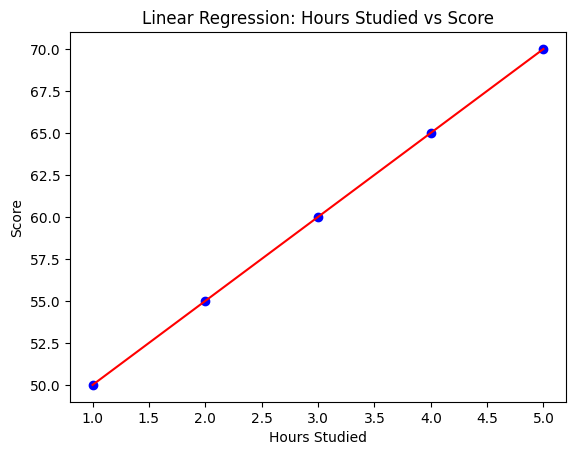

In [25]:
import matplotlib.pyplot as plt

# Plot points
plt.scatter(x, y, color="blue")
# Plot regression line
plt.plot(x, model.predict(x), color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Linear Regression: Hours Studied vs Score")
plt.show()

In [27]:
X_extra = np.arange(0, 7.1, 0.1).reshape(-1, 1)

In [28]:
y_pred = model.predict(X_extra)

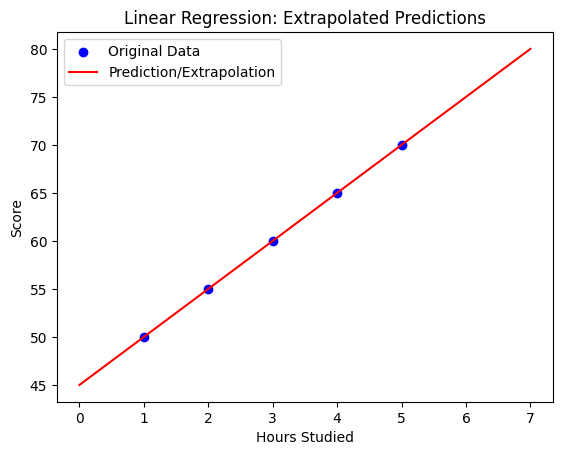

In [30]:
# Plot original points
plt.scatter(x, y, color="blue", label="Original Data")

# Plot fitted regression line over extended region
plt.plot(X_extra, y_pred, color="red", label="Prediction/Extrapolation")

plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Linear Regression: Extrapolated Predictions")
plt.legend()
plt.show()

In [31]:
from sklearn.datasets import load_diabetes

In [32]:
diabetes = load_diabetes()

In [35]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [36]:
import pandas as pd

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()  # ✅ now this works!

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [37]:
X1 = diabetes.data

In [38]:
Y1 = diabetes.target

In [46]:
model1 = LinearRegression()

In [47]:
model1 = model.fit(X1,Y1)

In [48]:
print(f"Intercept: {model1.intercept_}")

Intercept: 152.13348416289597


In [49]:
print(f"Slope: {model1.coef_}")

Slope: [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


In [50]:
new_patient = [[0.05, -0.02, 0.03, 0.01, 0.02, -0.01, 0.0, 0.01, 0.02, -0.03]]

In [51]:
prediction = model1.predict(new_patient)
print(f"Prediction: {prediction[0]}")

Prediction: 169.4249303992582


In [52]:
many_patients = [
    [0.05, -0.02, 0.03, 0.01, 0.02, -0.01, 0.0, 0.01, 0.02, -0.03],
    [0.10, 0.01, 0.08, 0.03, -0.01, 0.02, 0.05, 0.00, 0.04, -0.01]
]

predictions = model1.predict(many_patients)
print(predictions)

[169.4249304  251.93693533]


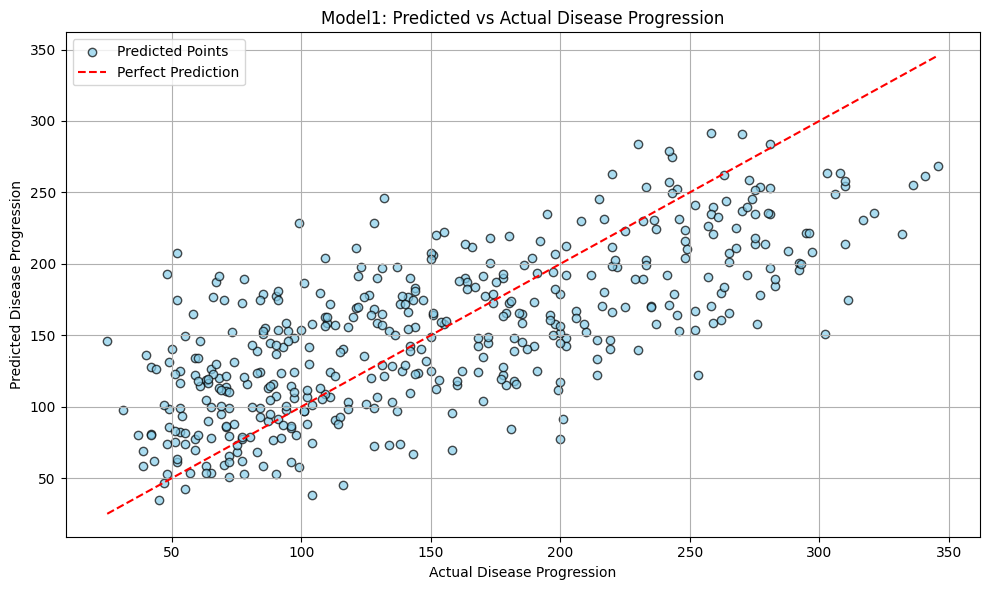

In [53]:
import matplotlib.pyplot as plt

# Predict using your trained model
Y1_pred = model1.predict(X1)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(Y1, Y1_pred, color='skyblue', edgecolor='black', alpha=0.7, label="Predicted Points")
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], color='red', linestyle='--', label="Perfect Prediction")

# Labels and title
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Model1: Predicted vs Actual Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on training data
Y1_pred = model1.predict(X1)

# R² Score
r2 = r2_score(Y1, Y1_pred)

# MAE
mae = mean_absolute_error(Y1, Y1_pred)

# MSE
mse = mean_squared_error(Y1, Y1_pred)

# RMSE
rmse = np.sqrt(mse)

# Print all
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score: 0.5177484222203499
Mean Absolute Error: 43.27745202531506
Mean Squared Error: 2859.69634758675
Root Mean Squared Error: 53.47612876402657


In [55]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(X1, columns=diabetes.feature_names)

# Select best features
X_selected = df[['bmi', 'bp', 's5']].values

# Refit model
model_selected = LinearRegression()
model_selected.fit(X_selected, Y1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


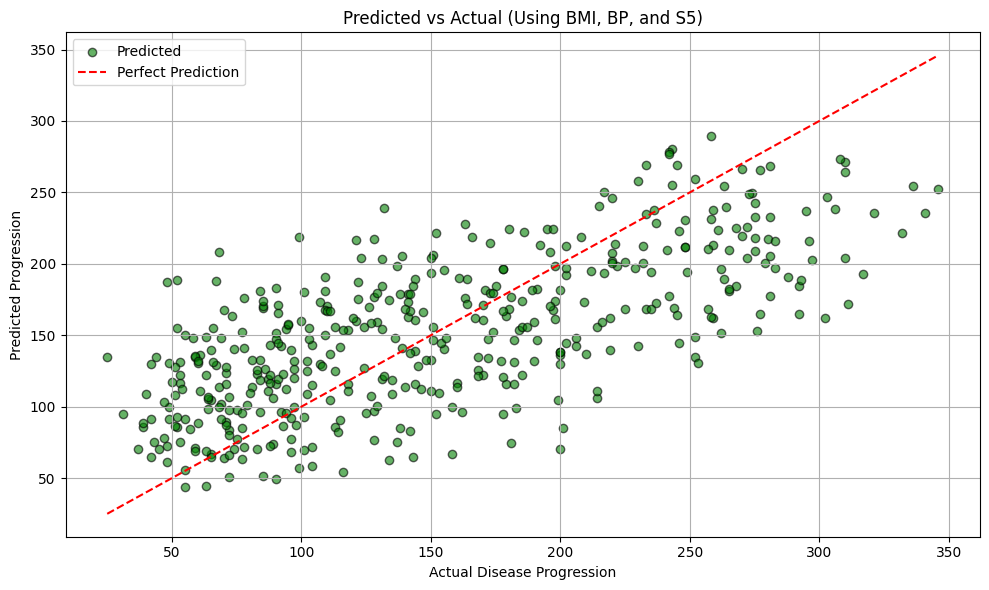

In [56]:
import matplotlib.pyplot as plt

# Predict using the selected feature model
Y1_pred_selected = model_selected.predict(X_selected)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(Y1, Y1_pred_selected, color='green', alpha=0.6, edgecolor='k', label='Predicted')
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'r--', label='Perfect Prediction')

# Labels & title
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Progression")
plt.title("Predicted vs Actual (Using BMI, BP, and S5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict with selected features
Y1_pred_selected = model_selected.predict(X_selected)

# R² Score
r2 = r2_score(Y1, Y1_pred_selected)

# MAE
mae = mean_absolute_error(Y1, Y1_pred_selected)

# MSE
mse = mean_squared_error(Y1, Y1_pred_selected)

# RMSE
rmse = np.sqrt(mse)

# Print everything
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score: 0.48008243046470156
Mean Absolute Error: 45.8899038452059
Mean Squared Error: 3083.0513432257203
Root Mean Squared Error: 55.52523159092378


In [58]:
from sklearn.model_selection import train_test_split

# Use full feature set for now
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression

model_split = LinearRegression()
model_split.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
y_pred = model_split.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print all
print(f"R² Score (Test): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score (Test): 0.4526027629719197
Mean Absolute Error: 42.79409467959994
Mean Squared Error: 2900.19362849348
Root Mean Squared Error: 53.853445836765914


In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Create and train the Ridge model
model_ridge = Ridge(alpha=100)  # try alpha=0.1, 10 too
model_ridge.fit(X_train, y_train)

# Predict
y_pred_ridge = model_ridge.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

# Show results
print(f"R² Score (Ridge): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score (Ridge): 0.012171803489062438
Mean Absolute Error: 63.23946698325042
Mean Squared Error: 5233.663686578425
Root Mean Squared Error: 72.3440646257758


In [94]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Create and train the Lasso model
model_lasso = Lasso(alpha=1)  # Try 0.01, 1, 10 too
model_lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = model_lasso.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

# Show results
print(f"R² Score (Lasso): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score (Lasso): 0.3575918767219115
Mean Absolute Error: 49.730327536622596
Mean Squared Error: 3403.5757216070733
Root Mean Squared Error: 58.340172450954185


In [98]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()
X1 = diabetes.data         # All 10 features
Y1 = diabetes.target       # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Create and train the Lasso model using all features
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = model_lasso.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

# Show results
print(f"R² Score (Lasso, all features): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score (Lasso, all features): 0.4718547867276227
Mean Absolute Error: 42.85442771664998
Mean Squared Error: 2798.1934851697188
Root Mean Squared Error: 52.897953506442185


In [102]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()
X1 = diabetes.data              # All 10 features
Y1 = diabetes.target            # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Create and train the Lasso model using all features
model_lasso = Lasso(alpha=0.01)  # You can tune this (try 0.01, 0.1, 1, etc.)
model_lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = model_lasso.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

# Show results
print(f"R² Score (Lasso, all features): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score (Lasso, all features): 0.4566861194580625
Mean Absolute Error: 42.831847073360876
Mean Squared Error: 2878.5593861866064
Root Mean Squared Error: 53.65220765436038


In [126]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load data
diabetes = load_diabetes()
X = diabetes.data      # All 10 features
y = diabetes.target    # Target

# Apply Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train Lasso model on polynomial features
model_lasso = Lasso(alpha=0.01, max_iter=10000)
model_lasso.fit(X_train, y_train)

# Predict
y_pred = model_lasso.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Show results
print(f"R² Score (Poly + Lasso): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score (Poly + Lasso): 0.49076078413751045
Mean Absolute Error: 41.12485933571041
Mean Squared Error: 2698.026641935072
Root Mean Squared Error: 51.942532109390584


In [127]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train LassoCV (automatically chooses best alpha)
model = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], max_iter=10000, cv=5)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Show results
print(f"Best alpha: {model.alpha_}")
print(f"R² Score (LassoCV): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.395e+04, tolerance: 1.706e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.370e+04, tolerance: 1.758e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Best alpha: 0.1
R² Score (LassoCV): 0.4718547867276227
Mean Absolute Error: 42.85442771664998
Mean Squared Error: 2798.1934851697188
Root Mean Squared Error: 52.897953506442185


c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+03, tolerance: 1.794e+02
  model = cd_fast.enet_coordinate_descent(


In [142]:
# Import libraries
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
diabetes = load_diabetes()
X = diabetes.data      # all 10 features
y = diabetes.target

# Select top 5 features
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Lasso model
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Show results
print(f"R² Score (Lasso + SelectKBest): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

R² Score (Lasso + SelectKBest): 0.4523833764344234
Mean Absolute Error: 44.0050716737303
Mean Squared Error: 2901.3559716607174
Root Mean Squared Error: 53.86423648081088
Selected feature indices: [2 8]


In [162]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Load data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 1: Select Top 3 Features
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Show selected feature indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

# Step 2: Apply Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_selected)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Train Lasso model
model = Lasso(alpha=0.0001, max_iter=10000)
model.fit(X_train, y_train)

# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 7: Print Results
print(f"R² Score (Poly + Lasso + SelectKBest): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Selected feature indices: [2 3 8]
R² Score (Poly + Lasso + SelectKBest): 0.4879881735590009
Mean Absolute Error: 42.41816360878455
Mean Squared Error: 2712.7163535195577
Root Mean Squared Error: 52.083743658838095


Selected Features (Indices): [1 2 3 4 5 7 8]
Optimal number of features: 7
Best Alpha chosen by CV: 0.0022254506435329174
R² Score: 0.45865030182370825
Mean Absolute Error: 42.70402645959691
Mean Squared Error: 2868.1528499516544
Root Mean Squared Error: 53.55513840848191


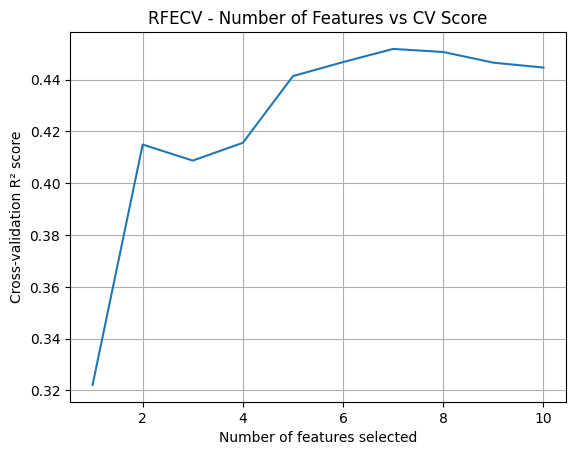

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the data
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Use LassoCV to automatically find best alpha
lasso_cv = LassoCV(cv=5, max_iter=10000)

# Step 2: Recursive Feature Elimination with CV
selector = RFECV(estimator=lasso_cv, step=1, cv=5, scoring='r2')
selector.fit(X_train, y_train)

# Step 3: Transform training and test set
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Step 4: Retrain LassoCV on selected features
model = LassoCV(cv=5, max_iter=10000)
model.fit(X_train_selected, y_train)

# Step 5: Predict
y_pred = model.predict(X_test_selected)

# Step 6: Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 7: Print Results
print("Selected Features (Indices):", np.where(selector.support_)[0])
print("Optimal number of features:", selector.n_features_)
print(f"Best Alpha chosen by CV: {model.alpha_}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Step 8: Plot (Fixed)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation R² score")
plt.plot(
    range(1, len(selector.cv_results_['mean_test_score']) + 1),
    selector.cv_results_['mean_test_score']
)
plt.title("RFECV - Number of Features vs CV Score")
plt.grid(True)
plt.show()


In [165]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and Y1 are already defined in the session
try:
    # Step 1: Apply Polynomial Features (degree=3)
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly.fit_transform(X1)

    # Step 2: Select K Best Features (k=8)
    k_best = SelectKBest(score_func=f_regression, k=8)
    X_kbest = k_best.fit_transform(X_poly, Y1)

    # Step 3: Use ElasticNetCV for automatic alpha selection
    elastic_cv = ElasticNetCV(cv=5, max_iter=10000, random_state=42)
    elastic_cv.fit(X_kbest, Y1)

    # Step 4: SelectFromModel to keep only important features based on ElasticNet
    selector = SelectFromModel(estimator=elastic_cv, threshold="mean", prefit=True)
    X_selected = selector.transform(X_kbest)

    # Step 5: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y1, test_size=0.2, random_state=42)

    # Step 6: Retrain ElasticNet with best alpha
    model = ElasticNetCV(alphas=[elastic_cv.alpha_], cv=5, max_iter=10000)
    model.fit(X_train, y_train)

    # Step 7: Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    result = {
        "Selected Features (Indices)": list(np.where(selector.get_support())[0]),
        "Best Alpha": model.alpha_,
        "R2 Score": r2,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }

except Exception as e:
    result = str(e)

result


{'Selected Features (Indices)': [0, 1],
 'Best Alpha': 0.0042960871510589966,
 'R2 Score': 0.39398256064778947,
 'Mean Absolute Error': 47.87006536467338,
 'Mean Squared Error': 3210.7723559354677,
 'Root Mean Squared Error': 56.66367757157549}